# 章節 13：模擬

本章是作者描述他為腎臟腫瘤患者的問題提出的解決方法。作者認為這個問題很重要且關係到病人和醫生的治療。此解決方法很有趣，因為雖然是用的被貝葉斯方法，但貝葉斯定理用的很隱晦。

這邊說明解決辦法跟作者的程式碼；在本章最後會解釋貝葉斯的部分。

如果你想知道更多技術細節，你可以在此閱讀作者的論文：http://arxiv.org/abs/1203.6890


## 13.1 腎臟腫瘤問題

作者是線上統計論壇（https://www.reddit.com/r/statistics ）的經常性讀者，也偶爾會是貢獻者。在 2011 年 11 月，作者閱讀到了以下訊息：

> 我有第四期的腎漲癌，我正試圖確定我是否在退役前就形成癌症。... 若知道退休日期跟檢測日期，有可能確定我在何時有 50/50 的機會換上此疾病的？有可能決定退休日期的機率嗎？檢測到我的腫瘤是 15.5 公分 x 15 公分。Grade II

作者聯繫了留訊者取得更多的資訊；例如退伍軍人更有可能得到不同的好處，而不是腫瘤在他們當兵的期間（考慮其他因素）。

因為腎臟腫瘤成長很慢，通常不會有症狀，通常會忽略它。因此，醫生可以透過不同時間對同一名病患掃描來觀察生長速率。

這裏用到 Zhang 等人的論文資料。聯絡 Zhang 後作者希望可以得到原始資料，但他們以醫療隱私拒絕了。然而，作者還是透過列印他們的圖片並且用尺測量來得到數據。

他們的論文提到，成長速率是倒數的倍增時間（RDT），也就是以每年兩倍生長為單位。所以腫瘤是 RDT=1 表示體積每年變 2 倍；RDT=2 表示體積每年變 4 倍；若 RDT=-1 表示體積每年變 0.5 倍。

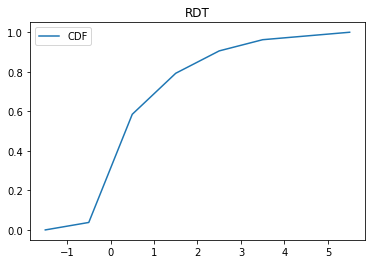

In [60]:
# data 
import thinkbayes as tb
import numpy as np
import matplotlib.pyplot as plt

import scipy

def plot_dist(dist, c=None):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y, c=c)

n = 53.0
freqs = [0, 2, 31, 42, 48, 51, 52, 53]
ps = [freq/n for freq in freqs]
xs = np.arange(-1.5, 6.5, 1.0)

cdf = tb.Cdf(xs, ps)

plot_dist(cdf)

plt.legend(["CDF"])
plt.title("RDT")
plt.show()

上圖是 53 名病患 RDT 的 CDF 圖。

作者用兩個冪次分佈的混合體，擬合（fit）上方 CDF，以處理資料太少的問題。

擬合的參數參考自作者的論文：http://arxiv.org/abs/1203.6890

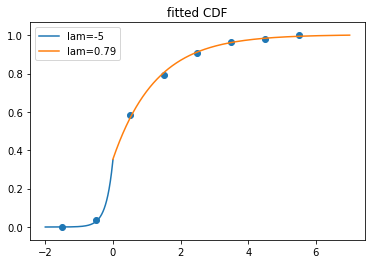

In [72]:

def make_exp_pmf(low, high, lam, n=1000, frac=1.0):
    pmf = tb.Pmf()
    for i in np.linspace(low, high, n):
        pmf.Set(i, tb.EvalExponentialPdf(i, lam))
    
    pmf.Normalize(fraction=frac)
    return pmf


def plot_pmf2cdf(pmf, base):
    a = []
    total = 0.0
    for i, prob in sorted(pmf.Items()):
        total += prob
        a.append((i, total+base))

    x, y = zip(*a)
    plt.plot(x, y)


   
lam_lower = -5    
pmf_lower = make_exp_pmf(-2, 0, lam_lower, frac=0.35)

lam_higher = 0.79
pmf_higher = make_exp_pmf(0, 7, lam_higher, frac=0.65)
  
    
plot_pmf2cdf(pmf_lower, base=0.0)
plot_pmf2cdf(pmf_higher, base=0.35)

# 打印出資料集的點
x, y = zip(*sorted(cdf.Items()))
plt.title("fitted CDF")
plt.legend(["lam=-5", "lam=0.79"])
plt.scatter(x, y)
plt.show()

上圖的線分別是擬合的結果，點是資料集。